# Basics

In [24]:
a = 1 + 1442 + 20

1463

In [25]:
rand(2,3) * ones(3,1)

2x1 Array{Float64,2}:
 1.08866
 1.50466

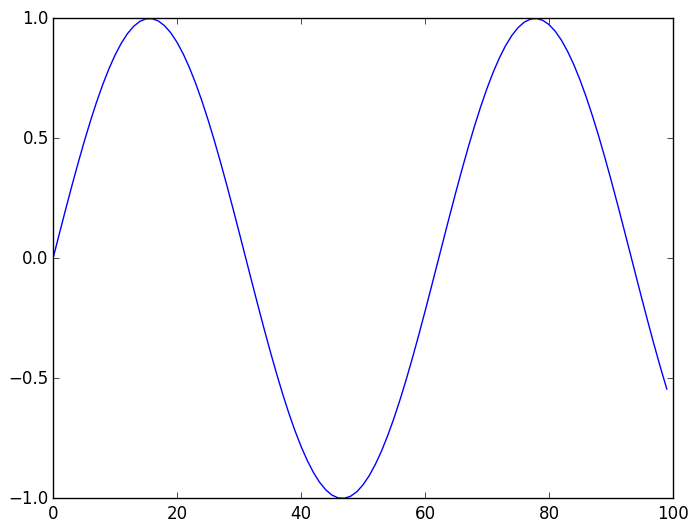

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1078e2c10>

In [26]:
using PyPlot
a = sin(linspace(0,10))
plot(a)

# Control flow - the usual suspects

In [15]:
x = false
x = 1

In [ ]:
if false
    println("jup!")
elseif 1+1 == 2
    println("but now!")
else
    println(".")
end

while rand()<0.99 && x > 5
end

try
    error("Brrr")
catch e
    println("Got error: $e")
finally
end

In [29]:
collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [30]:
[1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

In [31]:
for x = 1:10
end

for x in 1:10
end

for x in [1, "a"]
    @show x
end

x => 1
x => "a"


In [40]:
a = [uint8(x+1) for x in 1:3]

3-element Array{Uint8,1}:
 0x02
 0x03
 0x04

In [44]:
a = reshape(1:12,3,4)

3x4 Array{Int64,2}:
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [55]:
a[2:3,3:end]

2x2 Array{Int64,2}:
 8  11
 9  12

In [57]:
[x+y for x in 1:3, y in 1:3]

3x3 Array{Int64,2}:
 2  3  4
 3  4  5
 4  5  6

In [62]:
collect(zip(1:3, 4:6))

3-element Array{(Int64,Int64),1}:
 (1,4)
 (2,5)
 (3,6)

In [65]:
[x[1]+x[2] for x in zip(1:3, 4:6)]

collect((1:3) +(4:6))

3-element Array{Int64,1}:
 5
 7
 9

# Functions / Multiple dispatch

In [67]:
function f(a,b)
    return a*b
end

f(a,b) = a*b

f(a,b) = begin
    a*b
end

f (generic function with 1 method)

In [93]:
typeof(1)

Int64

In [92]:
1+2
+(1,2)

3

In [ ]:
+(a::Int64,b::Int64) = 0

In [71]:
f("abc",3)

LoadError: `*` has no method matching *(::ASCIIString, ::Int64)
while loading In[71], in expression starting on line 1

In [72]:
methods(f)

# 1 method for generic function "f":
f(a,b) at In[67]:5

In [75]:
f(a::String,b) = "blup"
f("abc",3)

"blup"

In [76]:
methods(f)

# 2 methods for generic function "f":
f(a::String,b) at In[75]:1
f(a,b) at In[67]:5

In [ ]:
class MyClass
  value1
end
print(a::MyClass) = do_output(a)

obj = MyClass(10)
obj.print(1,2,3)
print(obj,1,3,4)

otherinstance.print()


In [78]:
f(a::String, b::Float64) = "mit float"

f (generic function with 3 methods)

In [84]:
methods(f)

# 4 methods for generic function "f":
f(a::String,b::Float64) at In[78]:1
f(a::String,b) at In[75]:1
f(a::AbstractArray{T,N},b) at In[83]:1
f(a,b) at In[67]:5

In [83]:
f(a::AbstractArray,b) = a+b


f (generic function with 4 methods)

In [85]:
f(1:10,1)

2:11

In [ ]:
draw(a:MyClass) = ....

In [86]:
draw(a) = for point in a plot(point) end

draw (generic function with 1 method)

In [ ]:
#myclass <: geoprimitive

addtocanvas(mything)
...
for obj in objects
    draw(obj)
end
...

In [ ]:
function g(a::Float64, b::Int)
    println("with a asdf!")
    a*b*10
end

In [ ]:
function f{T<:FloatingPoint}(a::T, b::T)
    println("with 2 floats")
    a*b
end

In [ ]:
f(1.1,2.2)

In [87]:
methods(f)

# 4 methods for generic function "f":
f(a::String,b::Float64) at In[78]:1
f(a::String,b) at In[75]:1
f(a::AbstractArray{T,N},b) at In[83]:1
f(a,b) at In[67]:5

In [ ]:
@which f("asd",1.2)

# Types

In [1]:
type StringNumber
    a
    b
end
StringNumber("abc",1)

StringNumber("abc",1)

In [3]:
StringNumber(1,StringNumber(1,1))

StringNumber(1,StringNumber(1,1))

In [4]:
type StringNumber2{T<:Integer}
    a::String
    b::T
end
StringNumber2("Test",2)

StringNumber2("Test",2)

In [5]:
StringNumber2(1,2)

LoadError: `convert` has no method matching convert(::Type{String}, ::Int64)
while loading In[5], in expression starting on line 1

In [6]:
type StringNumber2{T<:Integer}
    a::String
    b::T
end


LoadError: f not defined
while loading In[6], in expression starting on line 1

In [12]:

function f(a::StringNumber2,b)
    println("asdfasdfadsf  StringNumber2: ", a.a, a.b)
end

x = StringNumber2("Test",10)

f(x,123)

asdfasdfadsf  StringNumber2: Test10


# Modules / Packages

In [ ]:
Pkg.add("JSON")
using JSON
jsonify(mydata)

Pkg.installed()
Pkg.remove("JSON")

* Available packages: [pkg.julialang.org](pkg.julialang.org)
* stored in ~/.julia/v0.3/
* Typical structure:


    ~/.julia/v0.3/StringNumbers/
      README.md 
      REQUIRE
      src/
        StringNumber.jl
      test/
        runtests.jl
    



In [ ]:
module StringNumbers

#export StringNumber, show

type StringNumber{T<:Number}
    str::String
    num::T
end

function show(a::StringNumber)
    println("It's a StringNumber: $(a.str) and $(a.num)")
end

end # module

In [ ]:
using StringNumber
StringNumbers.show(StringNumbers.StringNumber("asd",1))



# Finding your way around

* Documention:
  * latest (0.4pre): http://docs.julialang.org/en/latest/
  * stable (0.3): http://docs.julialang.org/en/release-0.3/
* Mailing lists:
  * users: https://groups.google.com/group/julia-users
  * devs: https://groups.google.com/group/julia-dev
* Issues:
  * [Github issues](https://github.com/JuliaLang/julia/issues?q=is%3Aopen+sort%3Aupdated-desc)
* Topical overview of packages: https://github.com/svaksha/Julia.jl
* Package evaluator: http://pkg.julialang.org/

# Code generation

In [14]:
mysum(a,b) = a+b+1
mysum(1,1)

3

In [19]:
eval((parse("mysum(1,1)")))

3

In [20]:
@code_lowered mysum(1,1.5)

1-element Array{Any,1}:
 :($(Expr(:lambda, {:a,:b}, {{},{{:a,:Any,0},{:b,:Any,0}},{}}, :(begin  # In[14], line 1:
        return a + b + 1
    end))))

In [21]:
@code_typed mysum(1,1.5)

1-element Array{Any,1}:
 :($(Expr(:lambda, {:a,:b}, {{},{{:a,Int64,0},{:b,Float64,0}},{}}, :(begin  # In[14], line 1:
        return (top(box))(Float64,(top(add_float))((top(box))(Float64,(top(add_float))((top(box))(Float64,(top(sitofp))(Float64,a::Int64))::Float64,b::Float64))::Float64,(top(box))(Float64,(top(sitofp))(Float64,1))::Float64))::Float64
    end::Float64))))

In [22]:
@code_llvm mysum(1,1.5)


define double @julia_mysum_21040(i64, double) {
top:
  %2 = sitofp i64 %0 to double, !dbg !3303
  %3 = fadd double %2, %1, !dbg !3303
  %4 = fadd double %3, 1.000000e+00, !dbg !3303
  ret double %4, !dbg !3303
}


In [30]:
@code_native +(1.1,1)

	.section	__TEXT,__text,regular,pure_instructions
Filename: promotion.jl
Source line: 158
	push	RBP
	mov	RBP, RSP
Source line: 158
	vcvtsi2sd	XMM1, XMM0, RDI
	vaddsd	XMM0, XMM1, XMM0
	pop	RBP
	ret


In [34]:
@code_native +(1,1)

	.section	__TEXT,__text,regular,pure_instructions
Filename: int.jl
Source line: 33
	push	RBP
	mov	RBP, RSP
Source line: 33
	add	RDI, RSI
	mov	RAX, RDI
	pop	RBP
	ret


In [35]:
@code_warntype mysum(1,1.1)

LoadError: @code_warntype not defined
while loading In[35], in expression starting on line 1

In [ ]:
function f(a,b)
    r = zero(a)
    @inbounds for i = 1:length(a)
        r[i] = a[i]+b[i]
    end
end
data = rand(Float32, 1000000000)
f(data,data)
@time f(data,data)


In [ ]:
data = rand(Float32,10)
@code_native f(data,data)

In [ ]:
function mysum2(a,b)
    r = 0
    r += a
    r += b
    r += 1
    r
end

In [ ]:
@code_warntype mysum2(1,1.5)

# Parallel computing

In [ ]:
addprocs(3)

In [ ]:
workers()

In [ ]:
@time map(x->svd(rand(1000,x)),200:210);

In [ ]:
@time pmap(x->svd(rand(1000,x)), 200:210);

In [ ]:
r = @fetch 1+1

In [ ]:
f(a,b) = a+b
